# Analisis financiero de las empresas del S&P500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [117]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return
sns.set()

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [106]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [107]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [108]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [109]:
print(df_simbolos)

    Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry  
0              Industrial Conglomerates  
1                     Building Products  
2                 Health Care Equipment  
3                       Pharmaceuticals  
4                 Health Care Equipment  
..                         

In [110]:
type(df_simbolos['Symbol'])  #Para visualizar el tipo de dato 

pandas.core.series.Series

In [111]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\3397331766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\3397331766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


In [112]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [61]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [113]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [63]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- TXN: No data found for this date range, symbol may be delisted


MOH                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2003-07-02  14.000000  14.160000  13.333333  13.333333  13.333333  8133000.0   
2003-07-03  13.566667  13.766667  13.433333  13.733333  13.733333   434400.0   
2003-07-07  13.733333  14.333333  13.733333  14.333333  14.333333  1237950.0   
2003-07-08  14.800000  15.066667  14.600000  14.633333  14.633333   955350.0   
2003-07-09  14.633333  15.000000  14.400000  15.000000  15.000000   454200.0   
...               ...        ...        ...        ...        ...        ...   
2003-06-27        NaN        NaN        NaN        NaN        NaN        NaN   
2003-06-30        NaN        NaN        NaN        NaN        NaN        NaN   
2003-07-01        NaN        NaN        NaN        NaN        NaN        NaN   
2020-12-31        NaN        NaN        NaN        NaN        NaN        NaN   
2001-09-12        NaN        NaN        NaN        NaN        NaN        NaN   

                   ES                                   ... TSLA        \
                 Open       High        Low      Close  ...  Low Close   
Date                                                    ...              
2003-07-02  16.600000  16.790001  16.600000  16.709999  ...  NaN   NaN   
2003-07-03  16.610001  16.790001  16.510000  16.540001  ...  NaN   NaN   
2003-07-07  16.740000  16.809999  16.670000  16.700001  ...  NaN   NaN   
2003-07-08  16.750000  16.799999  16.600000  16.680000  ...  NaN   NaN   
2003-07-09  16.650000  16.760000  16.590000  16.600000  ...  NaN   NaN   
...               ...        ...        ...        ...  ...  ...   ...   
2003-06-27  16.549999  16.559999  16.389999  16.440001  ...  NaN   NaN   
2003-06-30  16.549999  16.750000  16.480000  16.740000  ...  NaN   NaN   
2003-07-01  16.740000  16.799999  16.200001  16.700001  ...  NaN   NaN   
2020-12-31        NaN        NaN        NaN        NaN  ...  NaN   NaN   
2001-09-12        NaN        NaN        NaN        NaN  ...  NaN   NaN   

                                JBHT                                       \
           Adj Close Volume     Open     High      Low    Close Adj Close   
Date                                                                        
2003-07-02       NaN    NaN   9.5000   9.8400   9.5000   9.8050  8.064980   
2003-07-03       NaN    NaN   9.7950   9.8675   9.7425   9.7725  8.038249   
2003-07-07       NaN    NaN   9.7850   9.9675   9.7825   9.9600  8.192472   
2003-07-08       NaN    NaN  10.4225  10.5300  10.1125  10.1450  8.344640   
2003-07-09       NaN    NaN  10.1450  10.1450  10.0075  10.0925  8.301459   
...              ...    ...      ...      ...      ...      ...       ...   
2003-06-27       NaN    NaN   9.2000   9.5750   9.2000   9.5050  7.818222   
2003-06-30       NaN    NaN   9.6025   9.6225   9.3875   9.5250  7.834669   
2003-07-01       NaN    NaN   9.4750   9.6525   9.4225   9.5300  7.838781   
2020-12-31       NaN    NaN      NaN      NaN      NaN      NaN       NaN   
2001-09-12       NaN    NaN      NaN      NaN      NaN      NaN       NaN   

                       
               Volume  
Date                   
2003-07-02  2188400.0  
2003-07-03   494400.0  
2003-07-07  1443200.0  
2003-07-08  7180400.0  
2003-07-09  2195200.0  
...               ...  
2003-06-27  3756000.0  
2003-06-30  4692400.0  
2003-07-01  2035200.0  
2020-12-31        NaN  
2001-09-12        NaN  

[5285 rows x 3018 columns]

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista para posteriomente concatenarlos en un solo DataFrame Global

In [114]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Close']/x['Open']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [65]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
4406,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Monday,2000-01
4407,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Tuesday,2000-01
4408,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Wednesday,2000-01
4409,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Thursday,2000-01
4410,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,2020-12-24,138.110001,138.649994,136.720001,137.419998,135.851608,245300.0,JBHT,-0.002387,-0.005009,-0.007368,41.121943,Thursday,2020-12
4403,2020-12-28,138.759995,139.119995,136.429993,136.740005,135.179352,493100.0,JBHT,0.009704,-0.014664,-0.004948,41.126234,Monday,2020-12
4404,2020-12-29,137.500000,138.270004,135.649994,136.100006,134.546661,491100.0,JBHT,0.005543,-0.010234,-0.004680,41.126657,Tuesday,2020-12
4405,2020-12-30,135.910004,136.779999,134.949997,135.440002,133.894196,395000.0,JBHT,-0.001397,-0.003464,-0.004849,41.127566,Wednesday,2020-12


In [134]:
df_global=df_global.assign(Year=lambda x:x['Date'].dt.strftime('%Y'))  

In [115]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [116]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
4406,Monday,0.000000
4407,Tuesday,0.000000
4408,Wednesday,0.000000
4409,Thursday,0.000000
4410,Friday,0.000000
...,...,...
4402,Thursday,-0.002387
4403,Monday,0.009704
4404,Tuesday,0.005543
4405,Wednesday,-0.001397


In [68]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


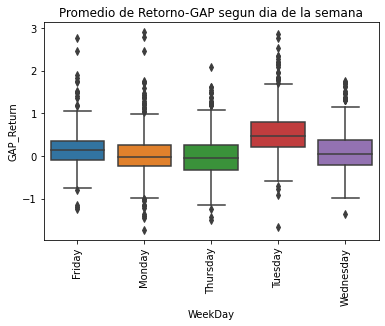

In [69]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [70]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000156
Monday,0.000029
Thursday,-0.000007
Tuesday,0.000501
Wednesday,0.000098


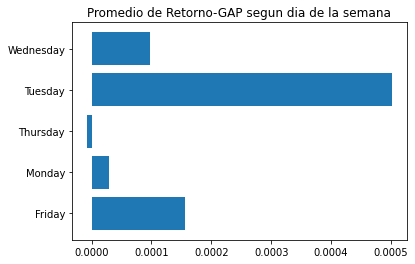

In [71]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

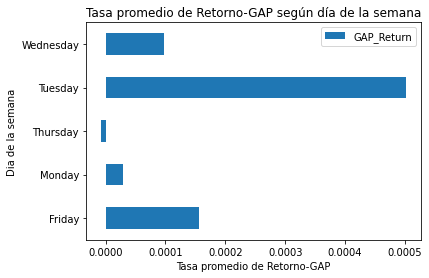

In [72]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

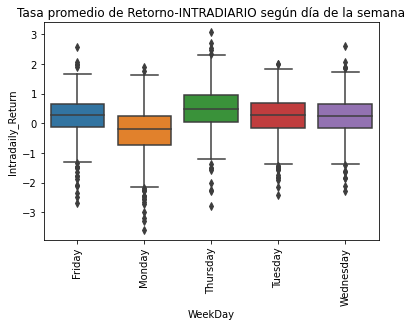

In [73]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [74]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
4406,Monday,0.000000
4407,Tuesday,0.000000
4408,Wednesday,0.000000
4409,Thursday,0.000000
4410,Friday,0.000000
...,...,...
4402,Thursday,-0.005009
4403,Monday,-0.014664
4404,Tuesday,-0.010234
4405,Wednesday,-0.003464


In [75]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,0.000216
Monday,-0.000297
Thursday,0.000453
Tuesday,0.000232
Wednesday,0.000204


<Figure size 720x720 with 0 Axes>

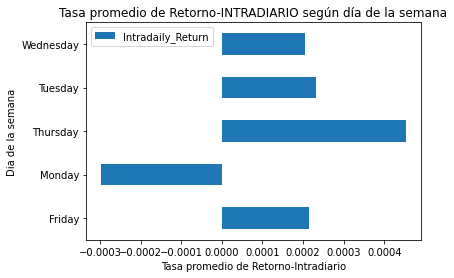

In [76]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

#  Mejores industrias que pertenecen al SP500 en las cuales se puede invertir

In [162]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1) #Se renombra la columa Symbols para hacer un join con df_global
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [78]:
# Serealiza el left join
df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Monday,2000-01,Molina Healthcare,Health Care,Managed Health Care
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Tuesday,2000-01,Molina Healthcare,Health Care,Managed Health Care
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Wednesday,2000-01,Molina Healthcare,Health Care,Managed Health Care
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Thursday,2000-01,Molina Healthcare,Health Care,Managed Health Care
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,MOH,0.000000,0.000000,NaN,NaN,Friday,2000-01,Molina Healthcare,Health Care,Managed Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,138.110001,138.649994,136.720001,137.419998,135.851608,245300.0,JBHT,-0.002387,-0.005009,-0.007368,41.121943,Thursday,2020-12,J.B. Hunt,Industrials,Trucking
2658351,2020-12-28,138.759995,139.119995,136.429993,136.740005,135.179352,493100.0,JBHT,0.009704,-0.014664,-0.004948,41.126234,Monday,2020-12,J.B. Hunt,Industrials,Trucking
2658352,2020-12-29,137.500000,138.270004,135.649994,136.100006,134.546661,491100.0,JBHT,0.005543,-0.010234,-0.004680,41.126657,Tuesday,2020-12,J.B. Hunt,Industrials,Trucking
2658353,2020-12-30,135.910004,136.779999,134.949997,135.440002,133.894196,395000.0,JBHT,-0.001397,-0.003464,-0.004849,41.127566,Wednesday,2020-12,J.B. Hunt,Industrials,Trucking


Se analizan las industrias de acuerdo a su retorno gap

In [79]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Health Care,0.000000
1,Health Care,0.000000
2,Health Care,0.000000
3,Health Care,0.000000
4,Health Care,0.000000
...,...,...
2658350,Industrials,-0.002387
2658351,Industrials,0.009704
2658352,Industrials,0.005543
2658353,Industrials,-0.001397


Se agrupan por industria y se calcula el promedio de retorno gap de cada una

In [80]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000083
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000118
Financials,0.000120
Health Care,0.000156
Information Technology,0.000170
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

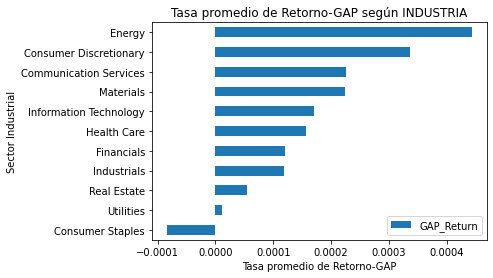

In [81]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [82]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Health Care,0.000000
1,Health Care,0.000000
2,Health Care,0.000000
3,Health Care,0.000000
4,Health Care,0.000000
...,...,...
2658350,Industrials,-0.005009
2658351,Industrials,-0.014664
2658352,Industrials,-0.010234
2658353,Industrials,-0.003464


In [83]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Energy,-0.000297
Communication Services,0.000032
Materials,0.000050
Consumer Discretionary,0.000101
Financials,0.000120
Information Technology,0.000192
Utilities,0.000200
Real Estate,0.000206
Industrials,0.000242


<Figure size 720x720 with 0 Axes>

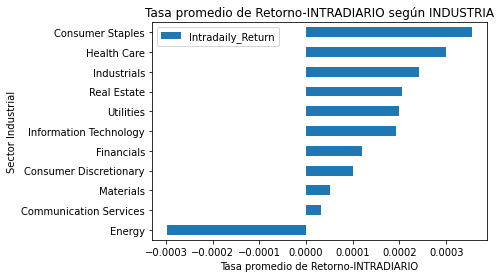

In [84]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

# Los  momentos de alta volatilidad que afectaron al SP500

”La volatilidad es una medida de la intensidad de los cambios aleatorios o
impredecibles en la rentabilidad o en el precio de un título. En la representación gráfica de una
serie histórica de rendimientos se asocia la volatilidad con la amplitud de las fluctuaciones del
rendimiento tanto es que se consideren en valor absoluto como en desviaciones alrededor de un
valor medio ”

In [85]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
1555,2009-09,214.222173
1554,2009-09,213.994101
1553,2009-09,213.990590
1558,2009-09,213.760672
1557,2009-09,213.593354
...,...,...
4651,2000-12,NaN
4652,2000-12,NaN
4653,2000-12,NaN
4654,2000-12,NaN


In [86]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.446000
2009-07,70.027835
2009-05,70.005558
2009-08,69.539561
2009-04,68.622294
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [87]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [88]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.446000
2009-07,70.027835
2009-05,70.005558
2009-08,69.539561
2009-04,68.622294
2009-09,68.430228
2009-03,66.466556
2009-02,64.093213
2009-10,62.804569


<Figure size 720x720 with 0 Axes>

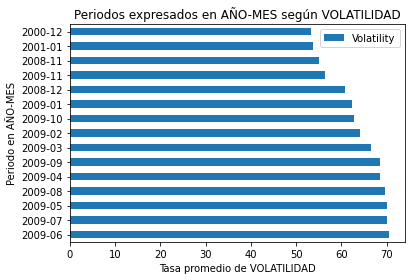

In [89]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [90]:
df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()

In [135]:
df_volatibilidades_por_anio=pd.DataFrame
df_volatibilidades_por_anio= df_global[['Year','Volatility']]
df_volatibilidades_por_anio = df_volatibilidades_por_anio.sort_values('Volatility',ascending=False)
df_volatibilidades_por_anio

,Year,Volatility
1555,2009,214.222173
1554,2009,213.994101
1553,2009,213.990590
1558,2009,213.760672
1557,2009,213.593354
...,...,...
4651,2000,NaN
4652,2000,NaN
4653,2000,NaN
4654,2000,NaN


In [140]:
df_volatibilidades_por_anio=df_volatibilidades_por_anio.groupby(['Year']).mean()
df_volatibilidades_por_anio = df_volatibilidades_por_anio.sort_values('Year',ascending=True)
df_volatibilidades_por_anio

,Volatility
Year,
2000,53.223942
2001,49.122703
2002,42.609621
2003,41.361039
2004,27.673723
2005,25.358943
2006,25.340181
2007,25.470770
2008,39.877883


<Figure size 1440x1440 with 0 Axes>

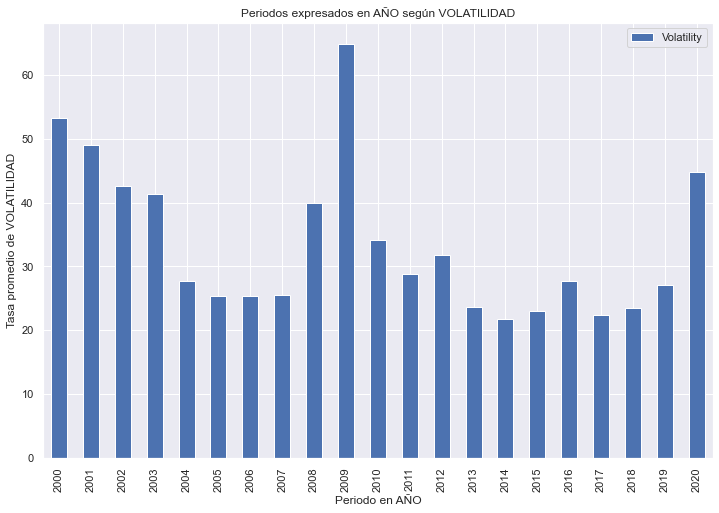

In [141]:
plt.figure(figsize=(20,20))
df_volatibilidades_por_anio.plot.bar()
plt.title('Periodos expresados en AÑO según VOLATILIDAD')
plt.xlabel('Periodo en AÑO')
plt.ylabel('Tasa promedio de VOLATILIDAD')
plt.show()

In [151]:
df_volatibilidades_anio=pd.DataFrame
df_volatibilidades_anio= df_global[['Year','Volatility']]
df_volatibilidades_anio = df_volatibilidades_anio.sort_values('Year',ascending=True)
df_volatibilidades_anio

,Year,Volatility
4406,2000,NaN
4535,2000,NaN
4536,2000,NaN
4537,2000,NaN
4538,2000,NaN
...,...,...
4347,2020,52.887829
4346,2020,52.811271
4345,2020,52.703200
4371,2020,53.931977


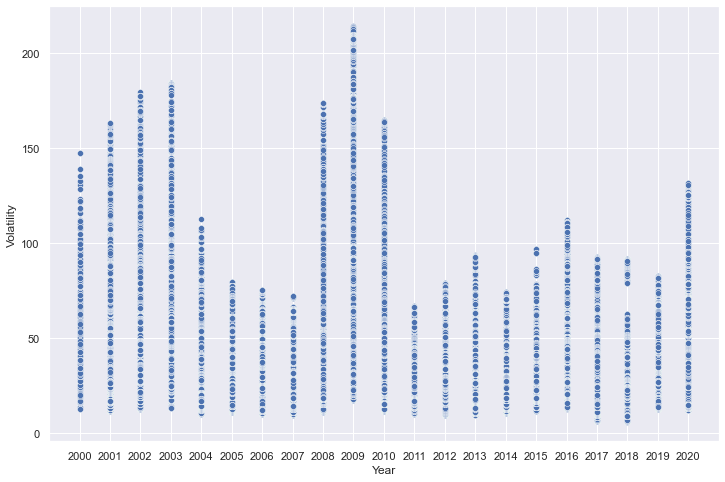

In [152]:

ax = sns.scatterplot(x='Year',y='Volatility', data=df_volatibilidades_anio )
style = dict(size=12, color='black')


# Las 9 mejores empresas para invertir

In [91]:
tickers

Index(['MOH', 'ES', 'QCOM', 'ORLY', 'BKR', 'UPS', 'CTAS', 'NEE', 'ENPH',
       'BF-B',
       ...
       'HLT', 'MNST', 'AMCR', 'FRT', 'GIS', 'INCY', 'GPC', 'ETN', 'TSLA',
       'JBHT'],
      dtype='object', length=503)

In [92]:
df_TYL=df_data.loc[:,'TYL']
df_TYL.reset_index(inplace=True)

df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
df_TYL.set_index(['Date'],inplace=True)

#df_TYL=df_TYL['Adj Close']

df_TYL

C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\2417216141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\2417216141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)


,TYL
Date,
2003-07-02,4.67
2003-07-03,4.51
2003-07-07,4.60
2003-07-08,4.99
2003-07-09,4.98
...,...
2003-06-27,4.55
2003-06-30,4.25
2003-07-01,4.58


# Comprender el precio de cierre ajustado
Los valores de las acciones se expresan en términos del precio de cierre y el precio de cierre ajustado. El precio de cierre es el precio sin procesar, que es solo el valor en efectivo del último precio negociado antes del cierre del mercado. El precio de cierre ajustado tiene en cuenta cualquier cosa que pueda afectar el precio de las acciones después del cierre del mercado.

In [153]:
list_tickers=[]
df_empresas=pd.DataFrame
for i in tickers:
    df_AdjClose_tickers=df_data.loc[:,i]
    df_AdjClose_tickers.reset_index(inplace=True)
    df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
    df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
    df_AdjClose_tickers.set_index(['Date'],inplace=True)
    
    list_tickers.append(df_AdjClose_tickers)
df_empresas=list_tickers[0]
df_empresas
    





C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\2500842419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_9004\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,MOH
Date,
2003-07-02,13.333333
2003-07-03,13.733333
2003-07-07,14.333333
2003-07-08,14.633333
2003-07-09,15.000000
...,...
2003-06-27,NaN
2003-06-30,NaN
2003-07-01,NaN


In [94]:
df_global_empresa2=df_empresas

# Rendimientos históricos

**¿Qué son los rendimientos históricos?**

Los rendimientos históricos a menudo se asocian con el rendimiento anterior de un valor o índice, como el S&P 500 . Los analistas revisan los datos de rendimiento históricos cuando intentan predecir rendimientos futuros o estimar cómo podría reaccionar un valor ante una situación particular, como una caída en el gasto del consumidor. Los rendimientos históricos también pueden ser útiles al estimar dónde pueden caer los puntos futuros de los datos en términos de desviaciones estándar .>

CONCLUSIONES CLAVE
- Los rendimientos históricos a menudo se asocian con el rendimiento anterior de un valor o índice, como el S&P 500.
- Los inversores estudian los datos históricos de rendimiento cuando intentan pronosticar rendimientos futuros o estimar cómo podría reaccionar un valor en una situación.
- El cálculo del rendimiento histórico se realiza restando el precio más reciente del precio más antiguo y dividiendo el resultado por el precio más antiguo.

Fuente: https://www.investopedia.com/terms/h/historical-returns.asp

In [95]:
i=1
while i<503:
    df_global_empresa2= df_global_empresa2.merge(list_tickers[i], how='left', left_index=True, right_index=True)
    i=i+1

In [96]:
df_global_empresa2

,MOH,ES,QCOM,ORLY,BKR,UPS,CTAS,NEE,ENPH,BF-B,...,HLT,MNST,AMCR,FRT,GIS,INCY,GPC,ETN,TSLA,JBHT
Date,,,,,,,,,,,,,,,,,,,,,
2003-07-02,13.333333,8.983117,12.701286,16.959999,17.121460,38.380825,27.997419,4.682024,NaN,5.992938,...,NaN,0.090000,NaN,17.505058,13.308610,5.26,18.047644,12.039649,NaN,8.064980
2003-07-03,13.733333,8.891726,12.607053,16.969999,17.008846,38.183697,27.478804,4.597274,NaN,5.968644,...,NaN,0.089792,NaN,17.515438,13.258281,5.24,18.031210,12.012613,NaN,8.038249
2003-07-07,14.333333,8.977741,13.421495,17.184999,16.732447,38.464458,27.912271,4.555595,NaN,6.022388,...,NaN,0.090625,NaN,17.857952,13.336568,5.83,18.305233,12.068186,NaN,8.192472
2003-07-08,14.633333,8.966991,13.290241,18.254999,16.860413,38.685490,28.934015,4.527115,NaN,5.987783,...,NaN,0.094583,NaN,17.806057,13.245172,5.82,18.332636,12.288974,NaN,8.344640
2003-07-09,15.000000,8.923983,13.158984,18.500000,17.121460,38.577961,28.500555,4.429862,NaN,5.875142,...,NaN,0.096042,NaN,17.562136,13.245172,6.06,18.305233,12.285972,NaN,8.301459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-06-27,NaN,8.837968,12.119058,16.840000,17.244305,37.634125,27.416882,4.636871,NaN,5.772070,...,NaN,0.087500,NaN,16.814810,13.283444,4.73,17.658524,11.790328,NaN,7.818222
2003-06-30,NaN,8.999246,12.095499,16.735001,17.182877,38.052273,27.424618,4.643818,NaN,5.788267,...,NaN,0.090625,NaN,16.607220,13.255487,4.86,17.543425,11.806846,NaN,7.834669
2003-07-01,NaN,8.977741,12.129155,16.764999,17.136810,38.291225,27.881310,4.643123,NaN,5.892813,...,NaN,0.088958,NaN,17.032791,13.364528,4.93,17.828428,11.887953,NaN,7.838781


In [154]:
# Se calcula el rendimiento histórico promedio anualizado
mean_returns=mean_historical_return(df_global_empresa2,frequency=252)


In [155]:
mean_returns_ordered=mean_returns.sort_values(ascending=False)
empresas_recomendadas=mean_returns_ordered[:9]
df_empresas_recomendadas= pd.DataFrame(empresas_recomendadas, columns=['Mean Historical Return'])
df_empresas_recomendadas.reset_index(inplace=True)
df_empresas_recomendadas.rename(columns={'index':'Ticker'},inplace=True) 
df_empresas_recomendadas

,Ticker,Mean Historical Return
0,TSLA,0.427733
1,PAYC,0.392239
2,MRNA,0.380185
3,SEDG,0.344088
4,CZR,0.336412
5,CARR,0.310215
6,EPAM,0.299750
7,NOW,0.295695
8,ENPH,0.294888


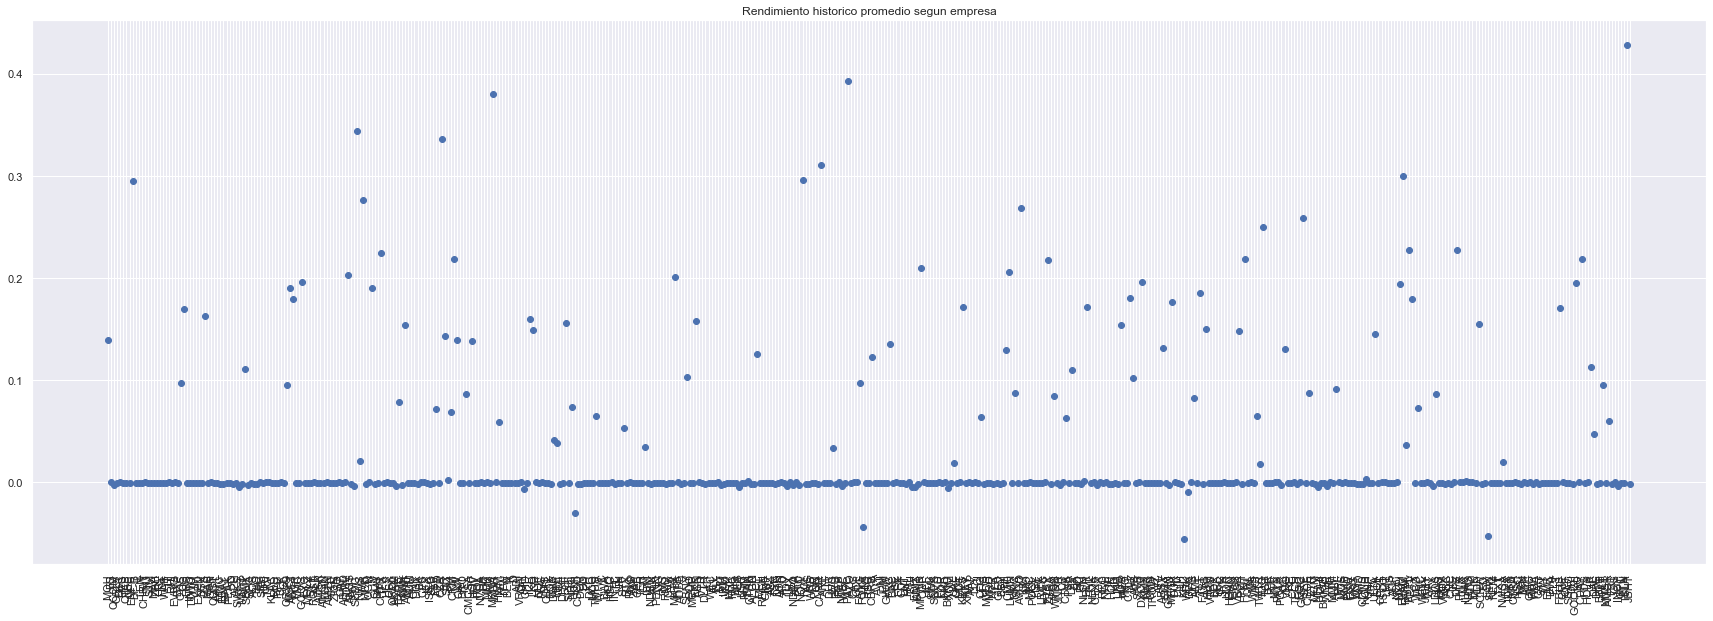

In [156]:
plt.figure(figsize=(30,10))
plt.plot(mean_returns,linestyle='None',marker='o')
plt.xticks(rotation=90)
plt.title('Rendimiento historico promedio segun empresa')
plt.show()

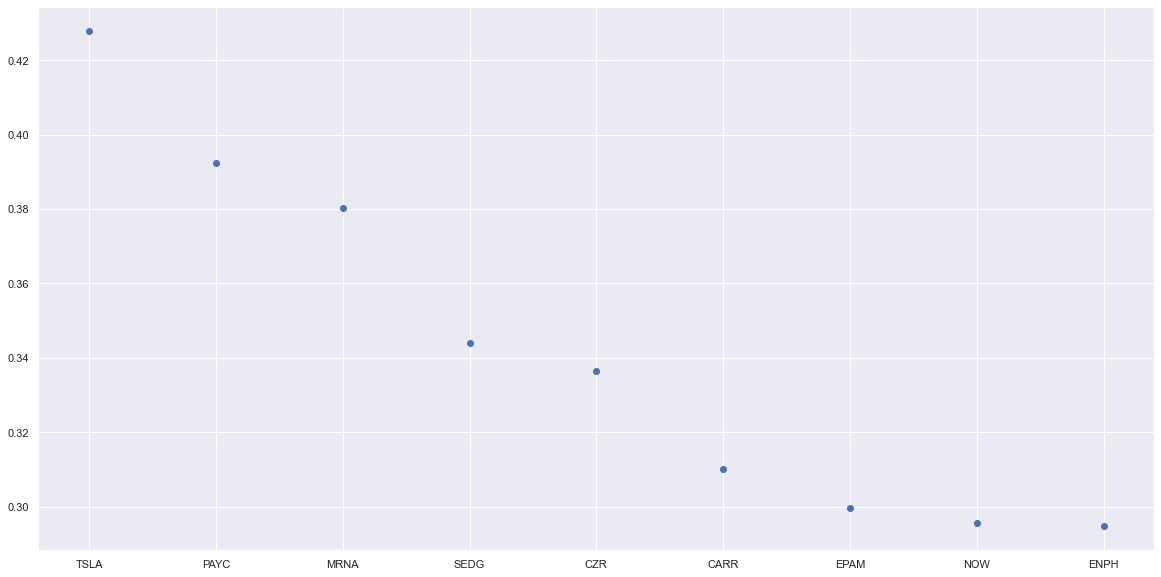

In [157]:
plt.figure(figsize=(20,10))
plt.plot(empresas_recomendadas,linestyle='None',marker='o')
plt.show()

In [160]:
lista_recomendadas=empresas_recomendadas.index
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['TSLA', 'PAYC', 'MRNA', 'SEDG', 'CZR', 'CARR', 'EPAM', 'NOW', 'ENPH']

In [163]:
df_empresas_recomendadas=df_empresas_recomendadas.merge(df_simbolos, on='Ticker', how='left')
df_empresas_recomendadas

,Ticker,Mean Historical Return,Security,GICS Sector,GICS Sub-Industry
0,TSLA,0.427733,"Tesla, Inc.",Consumer Discretionary,Automobile Manufacturers
1,PAYC,0.392239,Paycom,Information Technology,Application Software
2,MRNA,0.380185,Moderna,Health Care,Biotechnology
3,SEDG,0.344088,SolarEdge,Information Technology,Semiconductor Equipment
4,CZR,0.336412,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming
5,CARR,0.310215,Carrier Global,Industrials,Building Products
6,EPAM,0.299750,EPAM Systems,Information Technology,IT Consulting & Other Services
7,NOW,0.295695,ServiceNow,Information Technology,Systems Software
8,ENPH,0.294888,Enphase,Information Technology,Electronic Components


In [164]:
lista_recomendadas=df_empresas_recomendadas['Security']
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['Tesla, Inc.',
 'Paycom',
 'Moderna',
 'SolarEdge',
 'Caesars Entertainment',
 'Carrier Global',
 'EPAM Systems',
 'ServiceNow',
 'Enphase']

In [165]:
print("Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: ")
for i in lista_recomendadas:
    print(f'- {i}')

Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: 
- Tesla, Inc.
- Paycom
- Moderna
- SolarEdge
- Caesars Entertainment
- Carrier Global
- EPAM Systems
- ServiceNow
- Enphase
